In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
#to find adjusted r2 value
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [5]:
data = pd.read_csv("C:/Users/pranay/Downloads/50_Startups.csv")

In [6]:
data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
data.tail(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
40,28754.33,118546.05,172795.67,California,78239.91
41,27892.92,84710.77,164470.71,Florida,77798.83
42,23640.93,96189.63,148001.11,California,71498.49
43,15505.73,127382.30,35534.17,New York,69758.98
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [8]:
data.count()

R&D Spend          50
Administration     50
Marketing Spend    50
State              50
Profit             50
dtype: int64

In [9]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:
data.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [16]:
#removing State column beacuse it consist of character and has no affect on model, if we replace it with integer it might decrease the accuracy
data  = data.drop(columns = ['State'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

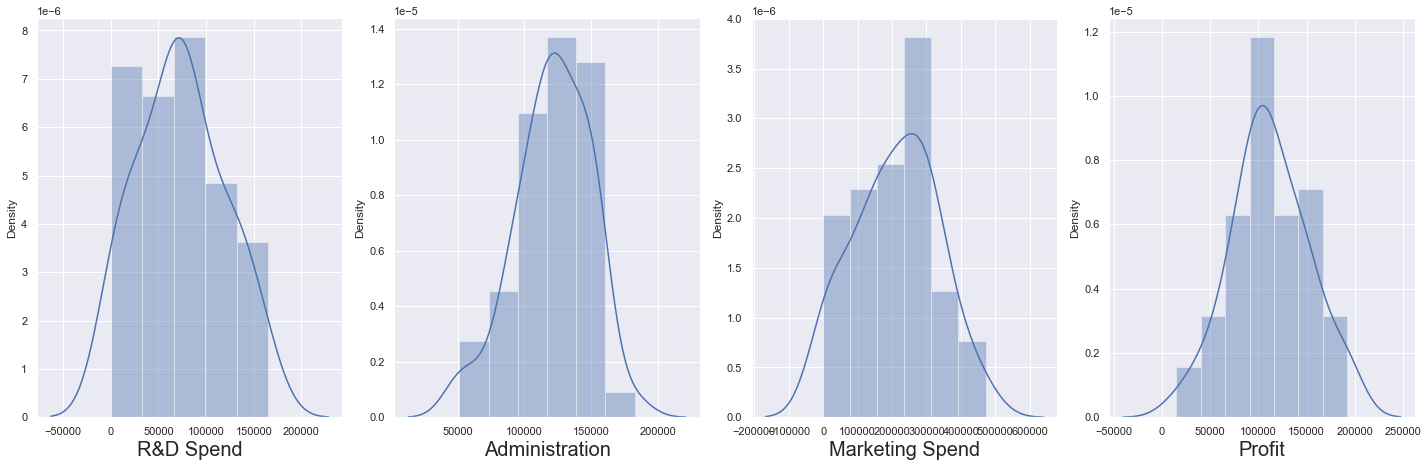

In [17]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber =1
for column in data :
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber += 1
    plt.tight_layout()

In [18]:
y = data['Profit']
X = data.drop(columns=['Profit'])

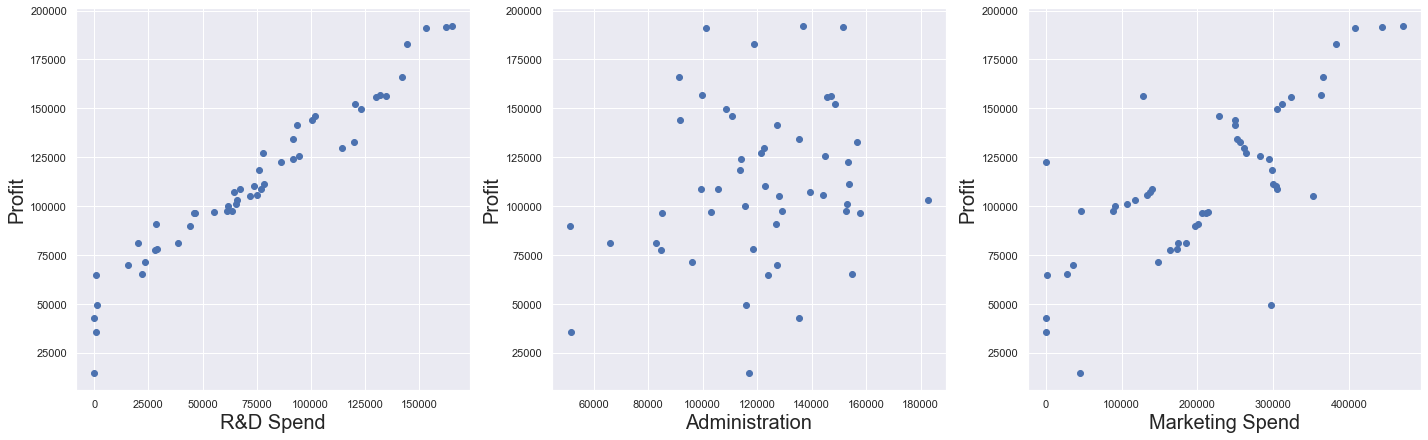

In [19]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Profit',fontsize=20)
    plotnumber +=1
plt.tight_layout()

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
#calculating vif score
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [22]:
vif

,VIF,Features
0,2.468903,R&D Spend
1,1.175091,Administration
2,2.326773,Marketing Spend


In [23]:
#vif scores are less than 5 so it's good to go withoout dropping any column

In [24]:
#splitting data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=42)

In [25]:
y_train

8     152211.77
3     182901.99
6     156122.51
41     77798.83
46     49490.75
47     42559.73
15    129917.04
9     149759.96
16    126992.93
24    108552.04
34     96712.80
31     97483.56
0     192261.83
44     65200.33
27    105008.31
33     96778.92
5     156991.12
29    101004.64
11    144259.40
36     90708.19
1     191792.06
21    111313.02
2     191050.39
43     69758.98
35     96479.51
23    108733.99
40     78239.91
10    146121.95
22    110352.25
18    124266.90
49     14681.40
20    118474.03
7     155752.60
42     71498.49
14    132602.65
28    103282.38
38     81229.06
Name: Profit, dtype: float64

In [26]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [27]:
#to save model to local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))

In [29]:
regression.score(x_train,y_train)

0.9543950361689993

In [30]:
adj_r2(x_test,y_test)

0.8925102709867464

In [31]:
#r2 score is in our test dataset

In [32]:
#checking overfitting of training data

In [33]:
#Lasso regularization
lasscv = LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [34]:
alpha = lasscv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=6.697941282787202)

In [35]:
lasso_reg.score(x_test,y_test)

0.9194989630290737

In [36]:
#ridge regularization
alphas = np.random.uniform(low=0,high=10,size=(50,))
ridgecv = RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([2.64067029, 5.10107427, 2.6770155 , 8.3278937 , 9.52807768,
       2.38033611, 8.49961782, 7.91841876, 1.33905489, 7.23368515,
       4.53822494, 2.07439747, 2.43132788, 9.69234324, 3.83487226,
       8.64239325, 3.7361993 , 4.07379581, 9.76011377, 8.75491688,
       7.95018809, 7.00919019, 4.57824183, 0.0902918 , 7.06334156,
       4.56536431, 3.07045936, 2.69262204, 2.32091654, 0.6812223 ,
       0.95988421, 7.84028172, 3.34361004, 2.33719069, 8.94439326,
       3.20781373, 1.63996021, 3.71884318, 5.34581274, 3.96247873,
       0.28566395, 2.87581467, 9.89649418, 3.48555931, 9.84500544,
       5.69978105, 8.26088305, 8.46503634, 7.70582589, 4.91604589]),
        cv=10, normalize=True)

In [37]:
ridgecv.alpha_

0.09029179888850769

In [38]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09029179888850769)

In [39]:
ridge_model.score(x_test,y_test)

0.9194950581862426

In [40]:
#Elastic Net
elasticCV = ElasticNetCV(alphas=None,cv=10)
elasticCV.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [41]:
elasticCV.alpha_

85.37505512548238

In [42]:
elasticCV.l1_ratio

0.5

In [43]:
elasticnet_reg = ElasticNet(alpha=elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train,y_train)

ElasticNet(alpha=85.37505512548238)

In [44]:
elasticnet_reg.score(x_test,y_test)

0.017921278041362565

In [51]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)

In [52]:
residuals = y_test.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1439.7317684521545


In [80]:
#improving model
data1 = pd.read_csv("C:/Users/pranay/Downloads/50_Startups.csv")

In [81]:
data1.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [83]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [84]:
label_encoder = preprocessing.LabelEncoder()
data1['State']= label_encoder.fit_transform(data1['State'])
  
data1['State'].unique()

array([2, 0, 1])

In [85]:
data1.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [88]:
y1 = data1['Profit']
x1 = data1.drop(columns=['Profit'])

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,train_size=0.7,random_state=0)

In [94]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [98]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [99]:
import pickle
filename = 'finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))

In [100]:
loaded_model = pickle.load(open(filename,'rb'))
y_pred1 = loaded_model.predict(x_test)

In [102]:
testing_data_model_score = loaded_model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = loaded_model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9355139722149947
Model Score/Performance on Training data 0.9515496105627431


In [109]:
df = pd.DataFrame(data={'Predicted value':y_pred1,'Actual Value':y_test})
df

,Predicted value,Actual Value
28,104055.184238,103282.38
11,132557.602897,144259.40
10,133633.012845,146121.95
41,72336.280811,77798.83
2,179658.272109,191050.39
27,114689.631334,105008.31
38,66514.822490,81229.06
31,98461.693213,97483.56
22,114294.704870,110352.25
4,169090.511275,166187.94


In [111]:
from sklearn.metrics import r2_score

r2Score = r2_score(y_pred1, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 93.39448007716635


In [112]:
lasscv = LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [113]:
alpha = lasscv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=163.50175150811606)

In [114]:
lasso_reg.score(x_test,y_test)

0.9370114099057439

In [115]:
elasticCV = ElasticNetCV(alphas=None,cv=10)
elasticCV.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [116]:
elasticCV.alpha_

83.74329861771156

In [117]:
elasticCV.l1_ratio

0.5

In [118]:
elasticnet_reg = ElasticNet(alpha=elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train,y_train)

ElasticNet(alpha=83.74329861771156)

In [119]:
elasticnet_reg.score(x_test,y_test)

0.025652988404558208